<a href="https://colab.research.google.com/github/Starksood/Experimental_Conundrums/blob/main/CH8_Rumi_poetry_maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text-Based Data in Tensorflow 
1. Tokenize using numbers and Sequences
2. Use Embeddings to simulate sentiment using vectors
3. DNN and RNN to classify Text

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
tokenizer = Tokenizer()

data="Again I am raging, I am in such a state by your soul that every bond you bind, I break, by your soul. \n I am like heaven, like the moon, like a candle by your glow; I am all reason, all love, all soul, by your soul. \n My joy is of your doing, my hangover of your thorn; whatever side you turn your face, I turn mine, by your soul. \n I spoke in error; it is not surprising to speak in error in this state, for this moment I cannot tell cup from wine, by your soul. \n I am that madman in bonds who binds the “divs”; I, the madman, am a Solomon with the “divs”, by your soul. \n Whatever form other than love raises up its head from my heart, forthwith I drive it out of the court of my heart, by your soul. \n Come, you who have departed, for the thing that departs comes back; neither you are that, by my soul, nor I am that, by your soul. \n Disbeliever, do not conceal disbelief in your soul, for I will recite the secret of your destiny, by your soul. \n Out of love of Sham-e Tabrizi, through wakefulness or nightrising, like a spinning mote I am distraught, by your soul. \n Reason says, “I will beguile him with the tongue;” \n Love says, “Be silent. I will beguile him with the soul.” \n The soul says to the heart, “Go, do not laugh at me and yourself. What is there that is not his, that I may beguile him thereby?” \n He is not sorrowful and anxious and seeking oblivion that I may beguile him with wine and a heavy measure. \n The arrow of his glance needs not a bow that I should \n beguile the shaft of his gaze with a bow. \n He is not prisoner of the world, fettered to this world of earth, that I should beguile him with gold of the kingdom of the world. \n He is an angel, though in form he is a man; he is not lustful that I should beguile him with women. \n Angels start away from the house wherein this form is, so how should I beguile him with such a form and likeness? \n He does not take a flock of horses, since he flies on wings; his food is light, so how should I beguile him with bread? \n He is not a merchant and trafficker in the market of the world that I should beguile him with enchantment of gain and loss. \n He is not veiled that I should make myself out sick and utter sighs, to beguile him with lamentation. \n I will bind my head and bow my head, for I have got out of hand; I will not beguile his compassion with sickness or fluttering. \n Hair by hair he sees my crookedness and feigning; what’s hidden from him that I should beguile him with anything hidden. \n He is not a seeker of fame, a prince addicted to poets, \n that I should beguile him with verses and lyrics and flowing poetry. \n The glory of the unseen form is too great for me to \n beguile it with blessing or Paradise. \n Shams-e Tabriz, who is his chosen and beloved – perchance \n I will beguile him with this same pole of the age."
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


In [3]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
    
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)    

In [4]:
print(tokenizer.word_index['again'])
print(tokenizer.word_index['i'])
print(tokenizer.word_index['am'])
print(tokenizer.word_index['raging'])
print(tokenizer.word_index['i'])
print(tokenizer.word_index['am'])
print(tokenizer.word_index['in'])
print(tokenizer.word_index['such'])
print(tokenizer.word_index['a'])
print(tokenizer.word_index['state'])
print(tokenizer.word_index['by'])
print(tokenizer.word_index['your'])
print(tokenizer.word_index['soul'])
print(tokenizer.word_index['that'])
print(tokenizer.word_index['every'])
print(tokenizer.word_index['bond'])
print(tokenizer.word_index['you'])
print(tokenizer.word_index['bind'])
print(tokenizer.word_index['i'])
print(tokenizer.word_index['break'])
print(tokenizer.word_index['by'])
print(tokenizer.word_index['your'])
print(tokenizer.word_index['soul'])

60
1
17
61
1
17
18
41
11
42
12
4
8
9
62
63
26
43
1
64
12
4
8


In [5]:
print(xs[6])


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 60  1 17 61
  1 17 18]


In [6]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 60  1 17
 61  1 17]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print(tokenizer.word_index)

{'i': 1, 'the': 2, 'of': 3, 'your': 4, 'is': 5, 'with': 6, 'beguile': 7, 'soul': 8, 'that': 9, 'him': 10, 'a': 11, 'by': 12, 'not': 13, 'and': 14, 'he': 15, 'should': 16, 'am': 17, 'in': 18, 'my': 19, 'to': 20, 'will': 21, 'his': 22, 'this': 23, 'for': 24, 'form': 25, 'you': 26, 'like': 27, 'love': 28, 'from': 29, 'out': 30, 'world': 31, 'all': 32, 'it': 33, 'who': 34, 'head': 35, 'heart': 36, 'or': 37, 'says': 38, '”': 39, 'bow': 40, 'such': 41, 'state': 42, 'bind': 43, 'reason': 44, 'whatever': 45, 'turn': 46, 'error': 47, 'wine': 48, 'madman': 49, '“divs”': 50, 'have': 51, 'do': 52, 'e': 53, 'me': 54, 'may': 55, 'so': 56, 'how': 57, 'hair': 58, 'hidden': 59, 'again': 60, 'raging': 61, 'every': 62, 'bond': 63, 'break': 64, 'heaven': 65, 'moon': 66, 'candle': 67, 'glow': 68, 'joy': 69, 'doing': 70, 'hangover': 71, 'thorn': 72, 'side': 73, 'face': 74, 'mine': 75, 'spoke': 76, 'surprising': 77, 'speak': 78, 'moment': 79, 'cannot': 80, 'tell': 81, 'cup': 82, 'bonds': 83, 'binds': 84, 'so

In [9]:
model = Sequential()
model.add(Embedding(total_words, 23))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1500, verbose=1)
              


Epoch 1/1500
17/17 [==============================] - 7s 16ms/step - loss: 5.3580 - accuracy: 0.0325
Epoch 2/1500
17/17 [==============================] - 0s 15ms/step - loss: 5.3070 - accuracy: 0.0229
Epoch 3/1500
17/17 [==============================] - 0s 15ms/step - loss: 5.0423 - accuracy: 0.0229
Epoch 4/1500
17/17 [==============================] - 0s 17ms/step - loss: 4.7851 - accuracy: 0.0344
Epoch 5/1500
17/17 [==============================] - 0s 16ms/step - loss: 4.7281 - accuracy: 0.0402
Epoch 6/1500
17/17 [==============================] - 0s 16ms/step - loss: 4.7085 - accuracy: 0.0478
Epoch 7/1500
17/17 [==============================] - 0s 16ms/step - loss: 4.6984 - accuracy: 0.0478
Epoch 8/1500
17/17 [==============================] - 0s 15ms/step - loss: 4.6888 - accuracy: 0.0478
Epoch 9/1500
17/17 [==============================] - 0s 16ms/step - loss: 4.6762 - accuracy: 0.0478
Epoch 10/1500
17/17 [==============================] - 0s 16ms/step - loss: 4.6593 - accura

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

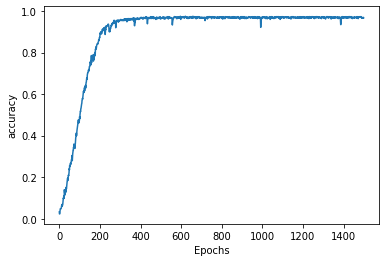

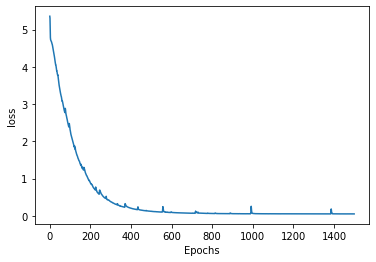

In [11]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


In [12]:
seed_text = "like the moon"

token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
#print(model.predict(token_list))
predicted = np.argmax(model.predict(token_list), axis=-1)
print(predicted)
for word, index in tokenizer.word_index.items():
         if index == predicted:
                 print(word)
                 break

[27]
like


In [34]:
seed_text = "market"
next_words=10

token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""


	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break

	seed_text += " " + output_word

print(seed_text)

market of the glory of the unseen form is too great
